# 5. Análise dos dados - ESG

- requer download do modelo de linguagem Spacy. Com o ambiente virtual ativo, rodar a seguinte linha:
!python -m spacy download pt_core_news_lg

## Importa módulos e carrega banco de dados

In [1]:
import sys
sys.path.append('../src')
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import analise_nlp


In [2]:
diretorio_txt = "../data/txt"
df = pd.read_json("../data/json/respostas.json").transpose() # Cria um dataframe do Pandas
df.reset_index(inplace=True)
df.rename(columns={'index': 'Fundo'}, inplace=True)
df.set_index('Fundo', inplace=True)
df_metadados = pd.read_json("../data/json/metadados.json")# Cria um dataframe do Pandas
df_metadados.set_index('Fundo', inplace=True) # Estabelece a coluna "Fundo" como índice
df_geral = df.merge(df_metadados, left_index=True, right_index=True)

In [3]:
df.head()

,Origem metodologia ASG,Objetivo ASG,Objetivo Geral/Específico,Método ASG,Índice,Referência ASG,URL referência ASG,Relatório ASG,Origem Metodologia ASG,URL Referência ASG
Fundo,,,,,,,,,,
Aviva IGC ESG IA FC FI Mult Cred Priv IE,n/d,n/d,n/d,n/d,n/d,n/d,n/d,não,NaN,NaN
BNPP M.CRED FI RF CRED PRIV LP SUST IS,NaN,mitigação das mudanças climáticas,específico,n/d,n/d,Anbima,NaN,Sim,interna,https://www.bnpparibas-am.com/pt-br/institucio...
ITAÚ INDEX ESG ÁGUA AÇÕES FX IE FC DE IS,NaN,aplicar seus recursos em cotas de fundos de in...,específico,investimento temático,n/d,Nações Unidas,n/d,Não,externa,NaN
SCHRODER BEST IDEAS ESG FIA IS,NaN,proporcionar aos seus Cotistas rentabilidade p...,geral,"[filtro positivo (""best-in-class""), integração...",n/d,n/d,NaN,Não,interna,https://www.schroders.com/pt-br/br/investidore...
SCH SUST AÇÕES GLOB USD FC FIA IS IE,interna,buscar retorno aos seus Cotistas através de in...,geral,n/d,n/d,n/d,https://www.schroders.com/pt-br/br/investidore...,Não,NaN,NaN


 # Colunas do dataframe

In [4]:
df.columns

Index(['Origem metodologia ASG', 'Objetivo ASG', 'Objetivo Geral/Específico',
       'Método ASG', 'Índice', 'Referência ASG', 'URL referência ASG',
       'Relatório ASG', 'Origem Metodologia ASG', 'URL Referência ASG'],
      dtype='object')

# Contagem geral de palavras dos objetivos

In [5]:
df_objetivos = df[[
 'Objetivo ASG'
]].fillna(value='')
df_objetivos['texto_completo'] = df_objetivos.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
texto_completo = ' '.join(df_objetivos['texto_completo'].tolist())

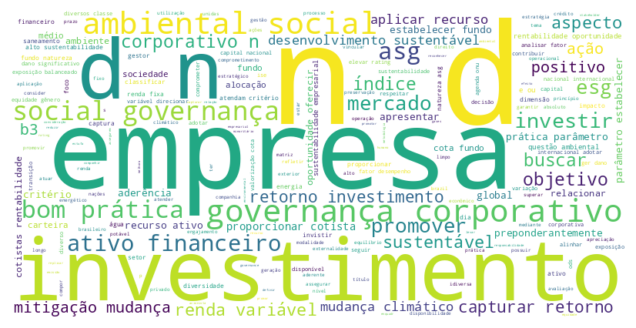

In [6]:
# Remover stop words e fazer word cloud
analise_nlp.gerar_word_cloud(analise_nlp.limpar_texto(texto_completo, analise_nlp.stop_words, return_string=True))

In [7]:
# TF-IDF
df_objetivos['texto_limpo'] = df_objetivos['texto_completo'].apply(lambda x: analise_nlp.limpar_texto(x, analise_nlp.stop_words, return_string=True))
tf_idf = analise_nlp.tfidf(df_objetivos['texto_limpo'].tolist())
soma_tfidf = tf_idf.sum(axis=0)
top_palavras = soma_tfidf.nlargest(20)
display(top_palavras)

governança          7.558262
investimento        6.313549
empresa             6.238533
corporativo         5.648521
prática             5.604101
social              5.332097
ambiental           5.288767
fundo               4.692977
ativo               4.681792
retorno             4.384261
asg                 4.383065
bom                 4.378832
mudança             4.190287
climático           4.171684
promover            4.166811
mitigação           3.972108
financeiro          3.680745
sustentabilidade    3.461614
investir            3.357600
esg                 3.351672
dtype: float64


## Percentagem de objetivos gerais ou específicos: qual a proporção de objetivos gerais e específicos dos fundos?

In [8]:
df["Objetivo Geral/Específico"].value_counts()/len(df["Objetivo Geral/Específico"]) * 100

Objetivo Geral/Específico
geral         45.637584
n/d           39.597315
específico    14.765101
Name: count, dtype: float64

## Métodos ASG: variedades e frequências: quais as principais metodologias ASG empregadas pelos fundos?

In [29]:
df_metodos = df[[
 'Método ASG'
]].fillna(value='')
# Mapeamento de valores antigos para novos
replace_dict = {
    'Best in Class': 'filtro positivo ("best-in-class")',
    'integração ASG': 'integração ESG',
    'filtro de exclusão': 'filtro negativo',
    'uso dos métodos de avaliação ESG proprietário': 'outros'
    # Adicione outras substituições conforme necessário
}

metodos_expandidos = df_metodos.explode('Método ASG')

# Substituindo os valores usando o dicionário de mapeamento
metodos_expandidos['Método ASG'] = metodos_expandidos['Método ASG'].replace(replace_dict)
metodos_counts = metodos_expandidos['Método ASG'].value_counts()
print(metodos_counts)

Método ASG
integração ESG                       64
n/d                                  59
engajamento                          40
filtro negativo                      24
filtro positivo                      18
investimento temático                14
filtro positivo ("best-in-class")     8
investimentos de impacto              2
outros                                2
Rating ESG                            1
filtro baseado em normas              1
Name: count, dtype: int64


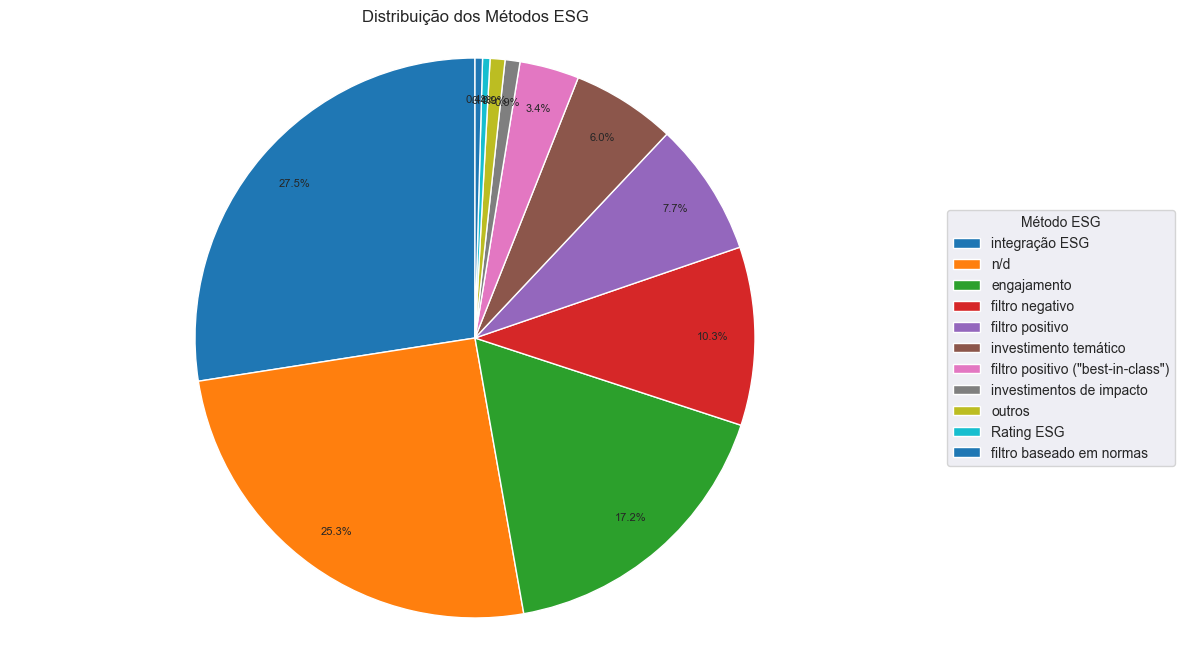

In [30]:
# Em gráfico
metodos_counts = metodos_expandidos['Método ASG'].value_counts()
percentagem = (metodos_counts / len(metodos_expandidos)) * 100
df_resultado = pd.DataFrame({
    'Número': metodos_counts,
    'Percentagem': percentagem
})
plt.figure(figsize=(12, 8))
patches, texts, autotexts = plt.pie(df_resultado['Percentagem'], startangle=90, autopct='%1.1f%%', pctdistance=0.85)
for text in texts + autotexts:
    text.set_fontsize(8)
plt.legend(df_resultado.index, title="Método ESG", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Distribuição dos Métodos ESG')
plt.axis('equal')
plt.show()

## Fundos que mencionam relatório ASG no regulamento: em que medida os fundos mencionam relatórios ASG em seu regulamento?

In [11]:
condicao_sim = df_geral['Relatório ASG'] == "Sim"
percentagem_sim = (condicao_sim.sum() / len(df_geral)) * 100
print(f"Percentagem de 'Sim' em 'Relatório ASG': {percentagem_sim:.2f}%")

Percentagem de 'Sim' em 'Relatório ASG': 16.78%


In [17]:
# Relatórios por gestor, em %
sim_df = df_geral[df_geral['Relatório ASG'] == "Sim"]
sim_count = sim_df.groupby('Gestor').size()
total_count = df_geral.groupby('Gestor').size()
percentagem_sim_por_gestor = (sim_count / total_count) * 100
data = {
    'Contagem Sim': sim_count,
    'Contagem Total': total_count,
    'Percentagem': percentagem_sim_por_gestor
}
table_df = pd.DataFrame(data)
display(table_df)

,Contagem Sim,Contagem Total,Percentagem
Gestor,,,
BANCO J SAFRA SA,NaN,1,NaN
BANCO SANTANDER (BRASIL) SA,NaN,1,NaN
BB ASSET MANAGEMENT,6.0,25,24.000000
BLACKROCK BRASIL GESTORA DE INVESTIMENTO,NaN,1,NaN
BNP PARIBAS ASSET,6.0,9,66.666667
BRADESCO,NaN,5,NaN
BRAM BRADESCO ASSET MANAGEMENT SA DTVM,1.0,17,5.882353
BRASILPREV SEGUROS E PREVIDENCIA SA,NaN,2,NaN
BTG PACTUAL,NaN,4,NaN


## Referências ASG: quais as principais referências ASG empregadas pelos fundos?

In [31]:
# Unifica e apresenta contagem de referências
df_ref = df[[
 'Referência ASG'
]].fillna(value='')
referencias_expandidas = df_ref.explode('Referência ASG')
mask_b3_cvm = referencias_expandidas['Referência ASG'].str.contains('Bolsa de Valores de São Paulo|Comissão de Valores Mobiliários', na=False)
mask_sfdr_blackrock = referencias_expandidas['Referência ASG'] == 'regulação europeia SFDR, BlackRock'
additional_data_b3_cvm = pd.DataFrame({'Referência ASG': ['B3', 'CVM'] * mask_b3_cvm.sum()})
additional_data_sfdr_blackrock = pd.DataFrame({'Referência ASG': ['Regulação Europeia SFDR', 'BlackRock'] * mask_sfdr_blackrock.sum()})
referencias_expandidas = referencias_expandidas[~mask_b3_cvm & ~mask_sfdr_blackrock]
referencias_expandidas = pd.concat([referencias_expandidas, additional_data_b3_cvm, additional_data_sfdr_blackrock], ignore_index=True)
replace_dict = {
    'Anbima': 'ANBIMA',
    'BM&FBOVESPA': 'B3',
    'B3 S.A.': 'B3',
    'Bradesco Asset Management': 'proprietária',
    'Bradesco Asset': 'proprietária',
    'S&P/B3 BRASIL ESG': 'S&P',
    'regulação europeia SFDR': 'Regulação Europeia SFDR',
    'taxonomia da União Europeia para atividades econômicas sustentáveis': 'Regulação Europeia SFDR',
    'Nações Unidas': 'Nações Unidas/ONU',
    'Pacto Global da ONU': 'Nações Unidas/ONU',
    'Princípios de Empoderamento Feminino da ONU Mulheres (WEPs)': 'Nações Unidas/ONU',
    'Princípios de Empoderamento Feminino da ONU Mulheres': 'Nações Unidas/ONU',
    'Agenda 2030 da ONU': 'Nações Unidas/ONU',
    'Formulário Metodologia ASG': 'ANBIMA',
    'Formulário de Metodologia ASG disponível no link': 'ANBIMA',
    'BRAM': 'proprietária', 'Sustainable Finance Disclosure Regulation (SFDR)': 'Regulação Europeia SFDR',     
    'política da gestora': 'proprietária',
    'www.itauassetmanagement.com.br/insights/investimento-responsavel': 'proprietária',
    'https://www.bb.com.br/docs/pub/siteEsp/dtvm/dwn/asg38226078.pdf': 'proprietária',
    'SAFRA': 'proprietária',
    'ISE B3': 'B3',
    'Bolsa de Valores de São Paulo (Novo Mercado e Níveis 1 e 2 de Governança Corporativa)': 'B3',
    'Comissão de Valores Mobiliários (CVM)': 'CVM',
    'S&P Dow Jones Índices LLC': 'S&P',
    'Política ASG da GESTORA': 'proprietária'
    
}
referencias_expandidas['Referência ASG'] = referencias_expandidas['Referência ASG'].replace(replace_dict)
ref_counts = referencias_expandidas['Referência ASG'].value_counts()
display(ref_counts)


Referência ASG
n/d                                              88
ANBIMA                                           21
B3                                               12
Regulação Europeia SFDR                           7
proprietária                                      7
Nações Unidas/ONU                                 5
CVM                                               4
S&P                                               3
MSCI Inc.                                         3
GSIA (Global Sustainable Investment Alliance)     2
Green Bond Principles, Climate Bonds              2
Sustainalytics                                    1
SAM                                               1
RepRisk                                           1
BlackRock                                         1
Name: count, dtype: int64

## Uso de índices: quais os principais índices ASG empregados pelos fundos?

In [36]:
unificar_indices = {
    'IGC-T': ['IGC-T', 'IGC-T divulgado pela B3', 'Índice BM&FBOVESPA de Governança Corporativa Trade – IGCT', 'IGCT da B3'],
    'IDIVERSA B3': ['IDIVERSA B3', 'Índice Diversidade B3'],
    'MSCI Extended Focus': ['MSCI USA Extended ESG Focus Index', 'MSCI Emerging Markets Extended ESG Focus Index', 'MSCI EAFE Extended ESG Focus Index'],
    'S&P/B3 BRASIL ESG': ['S&P/B3 BRASIL ESG', 'S&P/B3 BRAZIL ESG', 'S&P/B3 Brazil ESG'],
    'ISE': ['ISE B3', 'ISE'],
    
}

# Aplicar a função de unificação ao DataFrame
df_geral['Índice Unificado'] = df_geral['Índice'].apply(lambda x: next((unificado for unificado, originais in unificar_indices.items() if x in originais), x))

# Contar a quantidade de cada índice unificado
contagem_indices = df_geral['Índice Unificado'].value_counts()

# Exibir o resultado
print(contagem_indices)

Índice Unificado
n/d                    124
ISE                      8
S&P/B3 BRASIL ESG        6
IGC-T                    5
IDIVERSA B3              3
MSCI Extended Focus      3
Name: count, dtype: int64


In [37]:
# Salba banco de dados
df_geral.to_json("../data/json/dados.json")